In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from vaegan_fc import *
#from vaegan_conv import *
from vaegan import VAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
tf.reset_default_graph()

In [8]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(128)
build_decoder = Decoder(128)
build_discriminator = Discriminator(256)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 5e-4, num_epochs = 5, load=False, lr_decay=1.,
          checkpoint_name='test'
)

In [101]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 5, load=True, #lr_decay=0.95, lr_decay_freq=1000,
               load_file = 'checkpoints/vaegan_conv'
)

In [9]:
model.train()

Epoch 1 loss: 218.655810103 (time: 14.5874669552 s)
Epoch 2 loss: 181.804398831 (time: 15.5325801373 s)
Epoch 3 loss: 158.883076699 (time: 17.2244479656 s)
Epoch 4 loss: 147.88271526 (time: 14.6784920692 s)
Epoch 5 loss: 140.190526983 (time: 14.4721708298 s)
1.27494684855 min


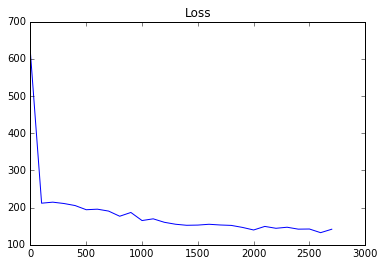

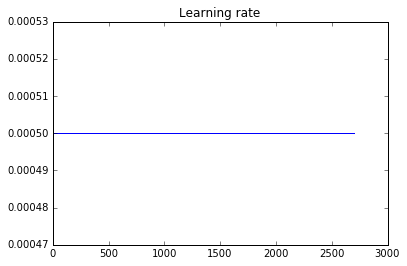

In [10]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [11]:
generated_images = model.generate()

In [12]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

0.82595


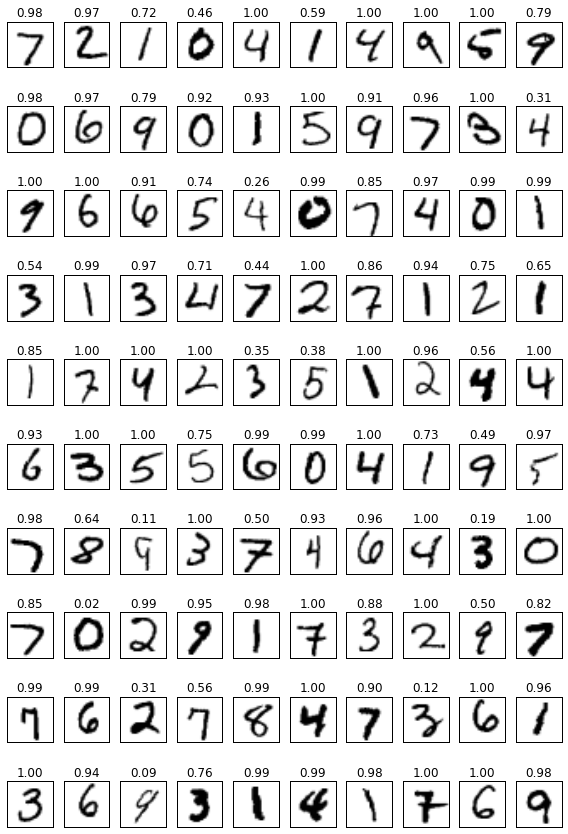

In [13]:
num_examples=10
print np.mean(x_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [14]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

0.0361317


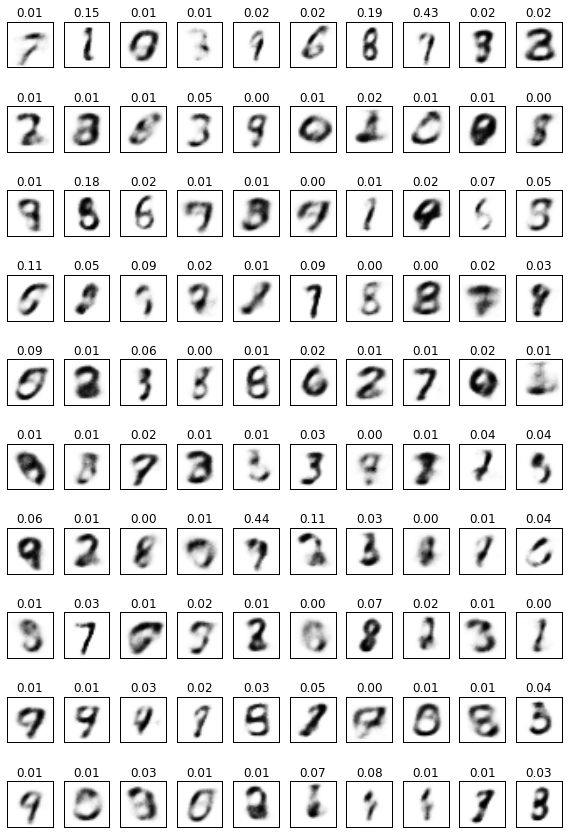

In [15]:
num_examples=10
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/VAEGAN_gen_fc')
plt.show()

In [16]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[  9.99999881e-01   9.99996424e-01   7.84910321e-01   9.99839902e-01
    9.99633193e-01   9.38729495e-02   1.07579208e-05   2.50511169e-02
    9.99916792e-01   9.99991298e-01   2.62240610e-06   1.13923415e-05
    7.37544688e-05   2.88328994e-03   3.53630230e-06   1.68850122e-03
    9.99998569e-01   4.65754837e-01   9.99976873e-01   1.59275078e-04
    1.95838176e-02   9.99964595e-01   9.45392847e-01   9.99321103e-01
    9.96986330e-01   3.18890321e-04   8.57718945e-01   1.00000000e+00
    9.38446581e-01   6.93549680e-07   9.99999762e-01   2.83434808e-01
    3.02366214e-03   5.54301264e-03   9.99972463e-01   1.04667088e-05
    9.99999881e-01   9.98891175e-01   3.76602856e-07   1.00000000e+00
    4.76250738e-01   9.98113871e-01   9.99997497e-01   7.31399953e-01
    9.99685287e-01   2.98022362e-03   9.99236941e-01   9.99999762e-01
    9.92975593e-01   6.57027185e-01   2.35316591e-04   1.43093629e-07
    2.29323377e-05   8.61799657e-01   9.90558982e-01   9.99735773e-01
    9.42230344e-01  